# CPG

El CPG, Central Patron Generator, o Generador Central de Patrones, es una parte del sistema nervioso que genera pulsos para coordinar actividades sin la necesidad de recibir un estímulo externo, cómo la locomoción.

A nivel programación, contamos con el modelo de una neurona BMS, y vamos a construir una función que tome la matríz de conexión, y una matriz de estados iniciales, de forma que se emule un CPG a tiempo discreto.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def cambio2(i, k, V, W, Z, N, gamma = 0.5, i_ext = 0.1, theta = 1):
    a = sum([W[i][j]*Z[j][k-1] for j in range(N)])

    V[i][k] = gamma * V[i][k-1] * (1 - Z[i][k-1]) + i_ext + a
    Z[i][k] = 1 if V[i][k] >= theta else 0 

In [5]:
class CPG:
    def __init__(self, K:int, W, V_0, gamma = 0.5, i_ext = 0.1, theta = 1):
        self.N = len(W)
        self.gamma = gamma
        self.i_ext = i_ext
        self.theta = theta
        self.W = W
        self.V_0 = V_0              # Estado inicial
        self.K = K                  
        #print(V_0.shape)
        #print(np.zeros((self.N, k)).shape)
        self.V = np.concatenate((V_0, np.zeros((self.N, K))), axis = 1)  
        self.Z = self.V.copy()
        
        for i in range(self.N):
            self.Z[i][0] = 1 if self.V[i][0] >= theta else 0
        
        #print(self.Z)
        #print(self.V)

    def cambio(self, i, k):
        acum = sum([self.W[i][j]*self.Z[j][k-1] for j in range(self.N)])

        self.V[i][k] = self.gamma * self.V[i][k-1] * (1 - self.Z[i][k-1]) + self.i_ext + acum
        self.Z[i][k] = 1 if self.V[i][k] >= self.theta else 0 

    def print_V(self):
        print(self.V)

    def simulacion(self):
        for k in range(1, self.K):
            for i in range(self.N):
                self.cambio(i, k)
        return self.Z

In [6]:
pesos = np.array([[0, 0.8],[1.7, 0]])
inicio = np.array([[0.8], [1.2]])

prueba = CPG(6, pesos, inicio)
Z = prueba.simulacion()
print(Z)

[[0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0.]]


In [7]:
W_w = np.array([
    [0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 9],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [6, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
    [0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 6, 0, 0, 0, 0, 0, 5, 0, 0]
])
Ini = np.array([
    [0],
    [0],
    [0],
    [1],
    [0.5],
    [0],
    [0.5],
    [0],
    [0],
    [1]
])
prueba2 = CPG(11, W_w, Ini)
Z = prueba2.simulacion()
print(Z)

[[0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]]


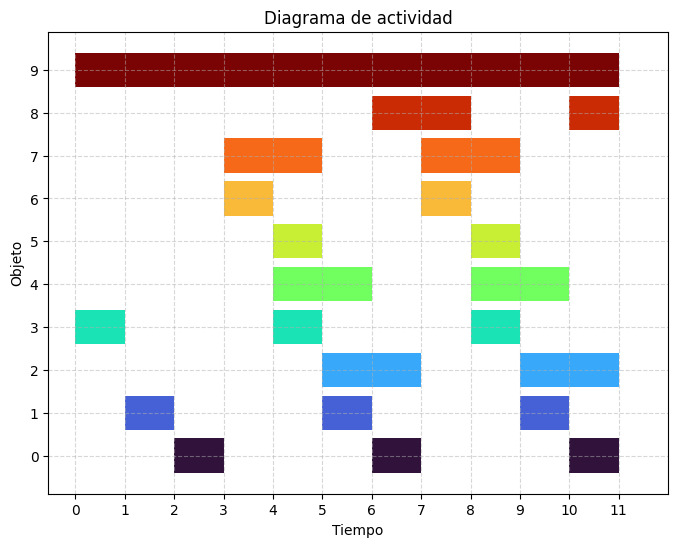

In [8]:
from graficas import graph 
    
graph(Z)
plt.show()

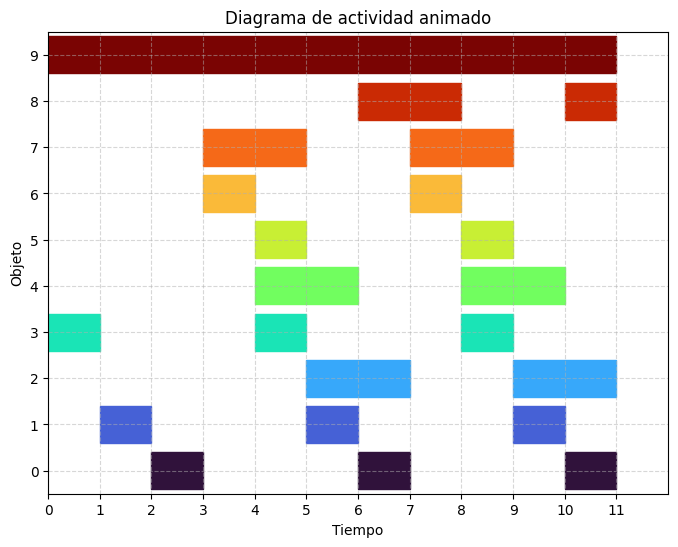

In [9]:
from graficas import anigraph


anigraph(Z)
plt.show()